# **COVID-19 and its effect on the stock market**

### *by Martin Segovia*


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS1U-53EP4jtwPlLKYJkBef4UJ43mGcL_Qcg&s"  width="600" height="305">

#### The objective of this project is to conduct a comprehensive analysis to determine whether the COVID-19 pandemic had a discernible impact on the stock market. This analysis will involve the exploration of relevant data between January 2020 and March 2023.

First, we install and upload the necessary libraries.

In [1]:
pip install alpha_vantage

In [2]:
import pandas as pd
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Styling format for dataframes
cell_hover = {
    'selector': 'tr:hover',
    'props': [('background-color', '#c96d76')]
}
headers = {
    'selector': 'th',#:not(.index_name)
    'props': 'background-color: #4f2429; color: white; text-align: center; font-size: 1.25em;'
}
table_data = {
    'selector': 'td',
    'props': 'text-align: center; font-weight: bold;'
}

## **Part 1: COVID-19 DATA**

We import the .csv files that contain information about the confirmed cases and deaths during the COVID-19 pandemic.

In [3]:
# URL of the CSV files
url_confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read the CSV file from the URL into a DataFrame
df_conf_cases = pd.read_csv(url_confirmed_cases)
df_death_cases = pd.read_csv(url_deaths)


After importing the data and dropping unnecessary columns, we can observe that both dataframes contain information from January 2020 to March 2023.

In [4]:
df_conf_cases.drop(['Lat', 'Long'], axis=1, inplace=True)
df_death_cases.drop(['Lat', 'Long'], axis=1, inplace=True)

In [5]:
df_conf_cases.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
df_death_cases.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


Now, we calculate the total number of confirmed cases and total number of deaths during the whole time period that we are considering.:

In [7]:
# Since the dataset has cumulative number of cases, we take the first and last columns
final_cases = df_conf_cases.iloc[:, [1, -1]]
final_cases.columns = ['Country/Region', 'Confirmed Cases']

final_deaths = df_death_cases.iloc[:, [1, -1]]
final_deaths.columns = ['Country/Region', 'Confirmed Deaths']

# Calculate the total number of confirmed cases
total_conf_cases = final_cases.groupby('Country/Region').sum().sum()

# Calculate the total number of deaths
total_deaths = final_deaths.groupby('Country/Region').sum().sum()

In [8]:
# We create a dataframe with the total number of confirmed and deaths cases
total_cases = pd.DataFrame({'Metric':['Confirmed','Deaths'],
                            'Number of Cases':[int(total_conf_cases.iloc[0]),int(total_deaths.iloc[0])]})

s = total_cases.style
s.set_table_styles([cell_hover,headers, table_data], overwrite=False)

,Metric,Number of Cases
0,Confirmed,676570149
1,Deaths,6881802


We generate a dataframe that contains the total number of confirmed cases and deaths per day. This will be useful to compare the evolution of the pandemic with the stock market.

In [9]:
# Confirmed Cases by day
conf_cases_filt = df_conf_cases.iloc[:, 2:]
conf_per_day = conf_cases_filt.sum(axis=0)

# Death cases by day
deaths_cases_filt = df_death_cases.iloc[:, 2:]
deaths_per_day = deaths_cases_filt.sum(axis=0)

In [10]:
# Dataframe with the evolution of cases by day
covid_by_day = pd.DataFrame({'date': conf_per_day.index,
                     'conf_cases': conf_per_day.values,
                     'deaths_cases':deaths_per_day.values})

covid_by_day['date'] = pd.to_datetime(covid_by_day['date'], format='%m/%d/%y')
covid_by_day['date'] = covid_by_day['date'].dt.date

cd = covid_by_day.style
cd.set_table_styles([cell_hover,headers, table_data], overwrite=False)

,date,conf_cases,deaths_cases
0,2020-01-22,557,17
1,2020-01-23,657,18
2,2020-01-24,944,26
3,2020-01-25,1437,42
4,2020-01-26,2120,56
5,2020-01-27,2929,82
6,2020-01-28,5580,131
7,2020-01-29,6169,133
8,2020-01-30,8237,172
9,2020-01-31,9927,214


## **Part 2: Stock Market Data (AlphaVantage)**

First, we download the stock market information from AlphaVantage

In [11]:
# We define the Alpha Vantage API key
#api_key = '6UF6TRKKMZRFC5V4'
api_key = 'IE0CFLNRZC8Q9412'

# We initialize the connection
ts = TimeSeries(key=api_key, output_format='pandas')

# We define the stocks that we are going to extract
stocks = {
    'Overall American Market': 'SPY',
    'Overall Canadian Market': 'XIU.TO',
    'Travel sector': 'DAL',
    'The Real Estate sector': 'SPG',
    'Precious metals (Gold)': 'GLD',
    'Precious metals (Silver)': 'SLV',
    'Precious metals (Platinum)': 'PPLT'
}

# We define a function to get the daily prices for any stock
def get_high_low_prices(symbol):
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    return data[['1. open', '2. high', '3. low', '4. close']]

# We iterate through each stock symbol and fetch the stock prices.
# For each stock we will have a dataframe that we store inside the stocks_df list.
stocks_df = []

for industry, stock_symbol in stocks.items():
    try:
        prices = get_high_low_prices(stock_symbol)
        prices.reset_index(inplace=True)
        prices.rename(columns={'index': 'Date'}, inplace=True)
        prices.columns = ['date', stock_symbol+'_open', stock_symbol+'_high', stock_symbol+'_low', stock_symbol+'_close']
        stocks_df.append(prices)

    except Exception as e:
        print(f"Error fetching data for {industry}: {e}")


Now, we create a dataframe containing the prices of all the stocks for the period that we are considering (Jan-2020 to Mar-2023)

In [12]:
# We create a dataframe containing the information of COVID-19 cases and deaths and all the stocks
combined_df = covid_by_day.copy()
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%m/%d/%y')

for i in range(len(stocks_df)):
  df_aux = stocks_df[i]
  combined_df = pd.merge(combined_df, df_aux, on='date', how='left')

In [13]:
# We fill NaN values with the previous value
df_stocks_final = combined_df.fillna(method = 'ffill')
df_stocks_final

,date,conf_cases,deaths_cases,SPY_open,SPY_high,SPY_low,SPY_close,XIU.TO_open,XIU.TO_high,XIU.TO_low,...,GLD_low,GLD_close,SLV_open,SLV_high,SLV_low,SLV_close,PPLT_open,PPLT_high,PPLT_low,PPLT_close
0,2020-01-22,557,17,332.24,332.95,331.170,331.34,26.41,26.57,26.37,...,146.38,146.79,16.71,16.750,16.620,16.66,94.920,95.9950,94.7816,95.5507
1,2020-01-23,657,18,330.63,332.17,329.410,331.72,26.41,26.52,26.38,...,146.62,147.12,16.58,16.690,16.560,16.61,94.530,95.1300,94.0200,94.6000
2,2020-01-24,944,26,332.44,332.53,327.360,328.77,26.57,26.57,26.36,...,146.89,147.98,16.69,16.950,16.675,16.91,94.700,95.7500,94.4913,94.8300
3,2020-01-25,1437,42,332.44,332.53,327.360,328.77,26.57,26.57,26.36,...,146.89,147.98,16.69,16.950,16.675,16.91,94.700,95.7500,94.4913,94.8300
4,2020-01-26,2120,56,332.44,332.53,327.360,328.77,26.57,26.57,26.36,...,146.89,147.98,16.69,16.950,16.675,16.91,94.700,95.7500,94.4913,94.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2023-03-05,676024901,6877749,399.71,404.45,399.030,404.19,30.98,31.28,30.94,...,170.98,172.49,19.30,19.560,19.150,19.55,89.720,90.9031,89.1003,90.3400
1139,2023-03-06,676082941,6878115,405.05,407.45,404.010,404.47,31.23,31.31,31.12,...,171.54,171.62,19.46,19.485,19.280,19.32,89.830,90.3900,89.5100,90.1900
1140,2023-03-07,676213378,6879038,404.42,404.67,397.625,398.27,31.20,31.20,30.71,...,168.52,168.62,18.98,18.990,18.410,18.45,88.460,88.4600,86.1001,86.1600
1141,2023-03-08,676392824,6880483,398.39,399.71,396.590,398.92,30.84,31.01,30.79,...,168.52,168.54,18.43,18.595,18.390,18.40,86.730,87.8800,86.7000,86.7700


## **Part 3 - Analyzing the data**

In [14]:
df_plot = df_stocks_final[['date','conf_cases','deaths_cases','SPY_close','XIU.TO_close','DAL_close','SPG_close','GLD_close','SLV_close','PPLT_close']]
df_plot.head()

,date,conf_cases,deaths_cases,SPY_close,XIU.TO_close,DAL_close,SPG_close,GLD_close,SLV_close,PPLT_close
0,2020-01-22,557,17,331.34,26.44,59.64,146.01,146.79,16.66,95.5507
1,2020-01-23,657,18,331.72,26.50,60.27,147.25,147.12,16.61,94.6000
2,2020-01-24,944,26,328.77,26.45,58.81,144.82,147.98,16.91,94.8300
3,2020-01-25,1437,42,328.77,26.45,58.81,144.82,147.98,16.91,94.8300
4,2020-01-26,2120,56,328.77,26.45,58.81,144.82,147.98,16.91,94.8300


We create a correlation heatmap to have an idea of any linear relationship between the COVID confirmed cases and deaths with the stocks' prices.
What we can observe is that the SPY and XIU are the stocks with some significant correlation with the confirmed cases and death cases. The correlations are positive and strong (bigger than 0.3).

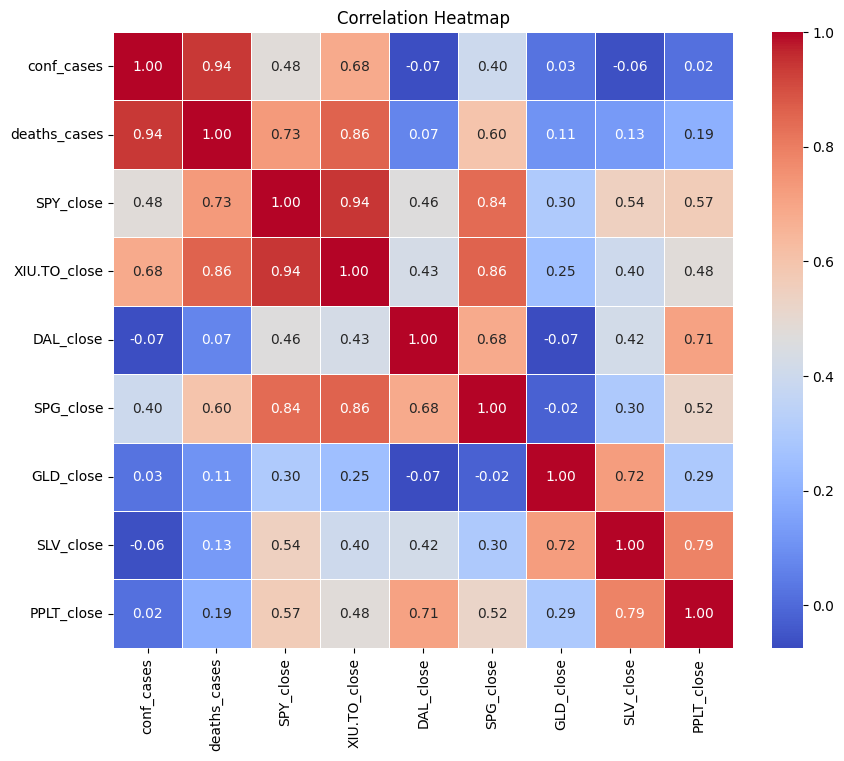

In [15]:
# We exclude the 'date' column from the dataframe
df_plot_no_date = df_plot.drop(columns=['date'])

# We calculate the correlation matrix
correlation_matrix = df_plot_no_date.corr()

# We create a heatmap using the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Finally, we plot each stock price evolution vs the number of cases and number of deaths during the pandemic.

  **Overall American Market** (SPY) *VS* **COVID Pandemic**

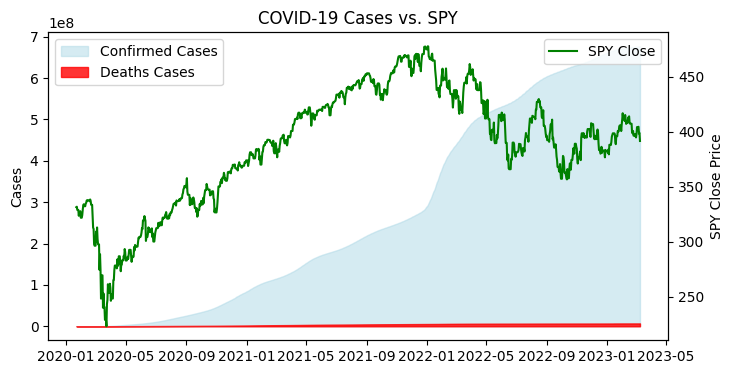

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['SPY_close'], color='green', label='SPY Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('SPY Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. SPY')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()


**Overall Canadian Market** (XIU.TO) *VS* **COVID Pandemic**

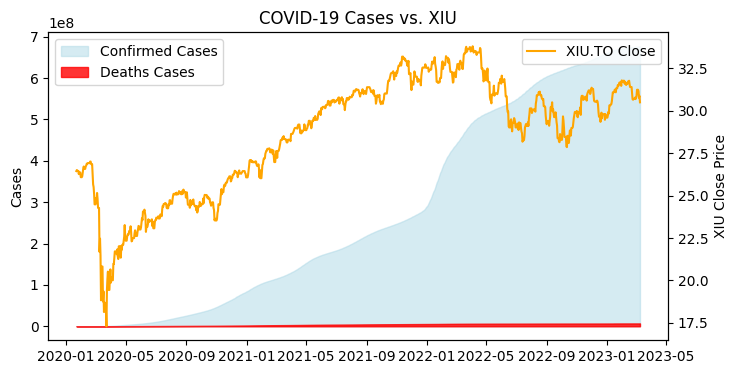

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['XIU.TO_close'], color='orange', label='XIU.TO Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('XIU Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. XIU')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()

**Travel Sector** (DAL) *VS* **COVID Pandemic**

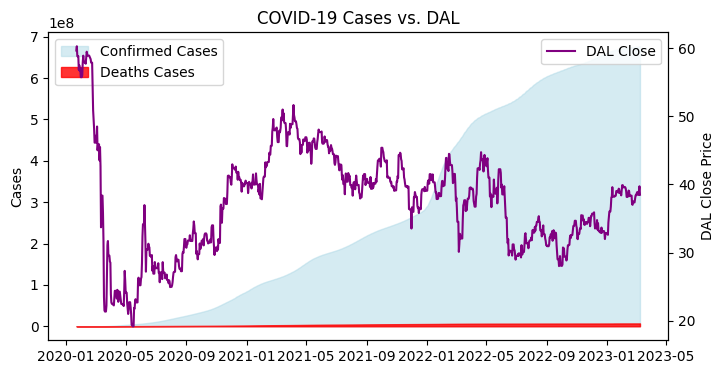

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['DAL_close'], color='purple', label='DAL Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('DAL Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. DAL')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()


**Real State Sector** (SPG) *VS* **COVID Pandemic**

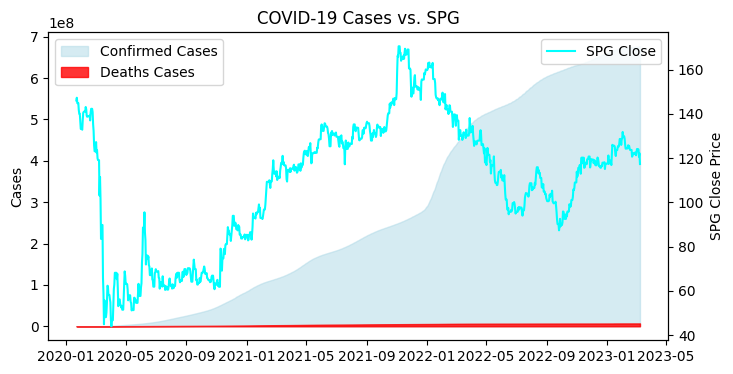

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['SPG_close'], color='cyan', label='SPG Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('SPG Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. SPG')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()


**Precious Metals-Gold** (GLD) *VS* **COVID Pandemic**

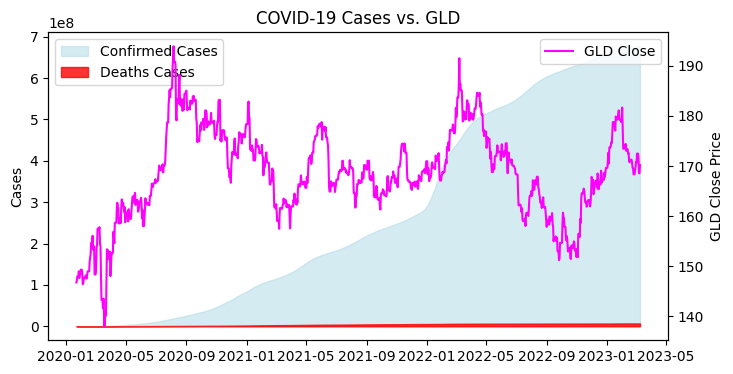

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['GLD_close'], color='magenta', label='GLD Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('GLD Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. GLD')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()


**Precious Metals-Silver** (SLV) *VS* **COVID Pandemic**

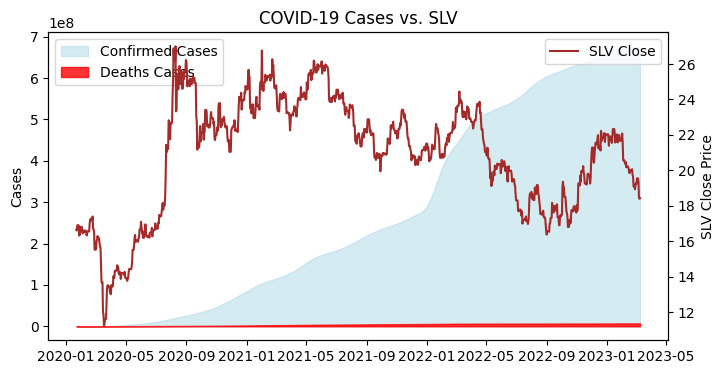

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['SLV_close'], color='brown', label='SLV Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('SLV Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. SLV')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()


**Precious Metals-Platinum** (PPLT) *VS* **COVID Pandemic**

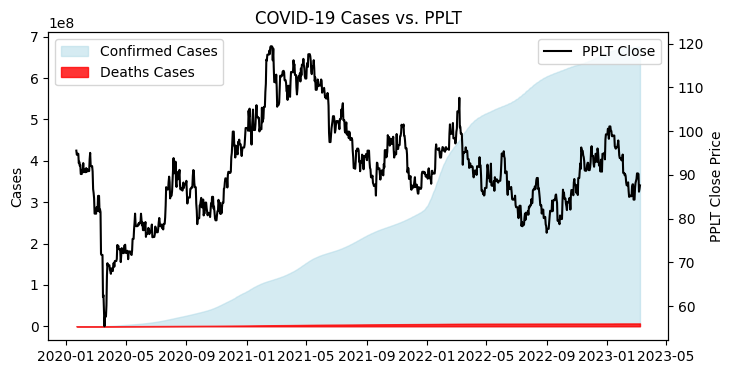

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot conf_cases and deaths_cases
ax.fill_between(df_plot['date'], df_plot['conf_cases'], color='lightblue', alpha=0.5, label='Confirmed Cases')
ax.fill_between(df_plot['date'], df_plot['deaths_cases'], color='red', alpha=0.8, label='Deaths Cases')
# Set the y-axis label
ax.set_ylabel('Cases')
# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()
ax2.plot(df_plot['date'], df_plot['PPLT_close'], color='black', label='PPLT Close', linestyle='-')
# Set the y-axis label
ax2.set_ylabel('PPLT Close Price')
# Add legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# Set title and labels
plt.title('COVID-19 Cases vs. PPLT')
plt.xlabel('Date')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show plot
plt.show()

## **Market Volatility**

In [44]:

# SPY volatility before the pandemic
spy_base = stocks_df[0].loc[:,['date','SPY_close']]
spy = spy_base[(spy_base['date']>='2017-01-01') & (spy_base['date']<='2019-12-31')]
spy = spy.sort_values(by='date').fillna(method = 'ffill')
spy_vol_prev = spy['SPY_close'].std()
# SPY volatility during the pandemic
spy_n = spy_base[(spy_base['date']>='2020-01-01') & (spy_base['date']<='2023-03-31')]
spy_n = spy_n.sort_values(by='date').fillna(method = 'ffill')
spy_vol_new = spy_n['SPY_close'].std()


# XIU volatility before the pandemic
xiu_base = stocks_df[1].loc[:,['date','XIU.TO_close']]
xiu = xiu_base[(xiu_base['date']>='2017-01-01') & (xiu_base['date']<='2019-12-31')]
xiu = xiu.sort_values(by='date').fillna(method = 'ffill')
xiu_vol_prev = xiu['XIU.TO_close'].std()
# XIU volatility after the pandemic
xiu_n = xiu_base[(xiu_base['date']>='2020-01-01') & (xiu_base['date']<='2023-03-31')]
xiu_n = xiu_n.sort_values(by='date').fillna(method = 'ffill')
xiu_vol_new = xiu_n['XIU.TO_close'].std()


# SPG volatility before the pandemic
spg_base = stocks_df[3].loc[:,['date','SPG_close']]
spg = spg_base[(spg_base['date']>='2017-01-01') & (spg_base['date']<='2019-12-31')]
spg = spg.sort_values(by='date').fillna(method='ffill')
spg_vol_prev = spg['SPG_close'].std()
# SPG volatility after the pandemic
spg_n = spg_base[(spg_base['date']>='2020-01-01') & (spg_base['date']<='2023-03-31')]
spg_n = spg_n.sort_values(by='date').fillna(method='ffill')
spg_vol_new = spg_n['SPG_close'].std()

volatilities = pd.DataFrame({'Stock':['SPY','XIU.TO','SPG'],
                             'Volatility before COVID':[spy_vol_prev, xiu_vol_prev, spg_vol_prev],
                             'Volatility after COVID':[spy_vol_new, xiu_vol_new, spg_vol_new]})


s = volatilities.style
s.set_table_styles([cell_hover,headers, table_data], overwrite=False)

,Stock,Volatility before COVID,Volatility after COVID
0,SPY,22.732627,52.974154
1,XIU.TO,0.968418,3.387095
2,SPG,11.338907,29.499280
